# A Notebook to demonstrate plotting of the output (hollow shell estimation)


## Installing the required packages

In [12]:
!pip install seaborn pptemp scienceplots


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


## Defining the Labels for the plots

In [13]:
label_dict = {
    "nAA_A": r"$n_{A-A}$",
    "nPP_P": r"$n_{P-P}$",
    "nMM_AP": r"$n_{M-M}$",
    "XAP": r"$X_{AP}$",
    "XA": r"$X_{A}$",
    "XP": r"$X_{P}$",
    "y": r"$y$",
    "DA": r"$D_{A}$",
    "DAP": r"$D_{AP}$",
    "DP": r"$D_{P}$",
    "DAPh": r"$D_{APh}$",
    "nAM_AP": r"$n_{A-M,AP}$",
    "nPM_AP": r"$n_{P-M,AP}$",
    "nAA_AP": r"$n_{A-A,AP}$",
    "nAP_AP": r"$n_{A-P,AP}$",
    "nPA_AP": r"$n_{P-A,AP}$",
    "nPP_AP": r"$n_{P-P,AP}$",
    "dA": r"$d_{A}$",
    "dP": r"$d_{P}$",
    "dAP": r"$d_{AP}$",
    "fA": r"$f_{A}$",
    "nAA": r"$n_{A-A}$",
    "nPP": r"$n_{P-P}$",
    "nAP": r"$n_{A-P}$",
    "nPA": r"$n_{P-A}$",
    "NA": r"$N_{A}$",
    "NP": r"$N_{P}$",
    "NAP": r"$N_{AP}$",
}

## Defining the functions to plot the data

In [14]:
import os
import re
import glob
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import scienceplots

import pptemp

plt.style.use(['science','nature'])
plt.rcParams.update({'font.size': 15})

class Analyze(object):
    def __init__(self, path = None):
        self.df = pd.DataFrame()
        
        if path is not None:
            self.init_df(path)
        
    def init_df(self, path):
        self.df = pd.read_csv(path)
    
    def L(self, D, d):
        return D/2/d
    
    def n(self, D, d):
        return  6 * self.L(D,d) * (20 * self.L(D,d) ** 2 + 15 * self.L(D,d) + 7) / (10 * self.L(D,d) ** 3 + 15 * self.L(D,d) ** 2 + 11 * self.L(D,d) + 3)
    
    def Natom(self, D, d):
        return (10 * self.L(D,d) ** 3 + 15 * self.L(D,d) ** 2 + 11 * self.L(D,d) + 3) / 3
    
    def calc_all_parameters(self):
        self.df["dAP"] = self.df["fA"] * self.df["dA"] + (1- self.df["fA"]) * self.df["dP"]
        
        self.df["nMM_AP"] = self.n(self.df["DAP"], self.df["dAP"])
        self.df["nAA_A"] = self.n(self.df["DA"], self.df["dA"])
        self.df["nPP_P"] = self.n(self.df["DP"], self.df["dP"])
        
        self.df["NA"] = self.Natom(self.df["DA"], self.df["dA"])
        self.df["NP"] = self.Natom(self.df["DP"], self.df["dP"])
        self.df["NAP"] = self.Natom(self.df["DAP"], self.df["dAP"])
        
        self.df["XA*NA"] = self.df["XA"] * self.df["NA"]
        self.df["XP*NP"] = self.df["XP"] * self.df["NP"]
        self.df["XAP*NAP"] = self.df["XAP"] * self.df["NAP"]
        
        
    def Plot(self):
        pass

    input_columns = ["dP", "dA", "fA", "nAA", "nPP", "nAP", "nPA", "DA", "DAP", "DP", "DAPh"]
    calculated_columns = ["dAP", "nMM_AP", "nAA_A", "nPP_P", "NA", "NP", "NAP"]
    solved_columns = ["nAM_AP", "nPM_AP", "nAA_AP", "nAP_AP", "nPA_AP", "nPP_AP", "XAP", "XA", "XP", "y"]
    hetero_columns = ["XA*NA", "XP*NP", "XAP*NAP", "y", "nAM_AP", "nPM_AP"]

    n_columns = ["nAA_A", "nPP_P", "nMM_AP"]
    X_columns = ["XAP", "XA", "XP"]
    y_columns = ["y"]
    D_columns = ["DA", "DAP", "DP", "DAPh"]
    N_columns = ["nAM_AP", "nPM_AP", "nAA_AP", "nAP_AP", "nPA_AP", "nPP_AP"]
    d_columns = ["dA", "dP", "dAP"]
    f_columns = ["fA"]
    n_sample_columns = ["nAA", "nPP", "nAP", "nPA"]
    N_calc_columns = ["NA", "NP", "NAP"]
    
    

    def calc_df_range(self, df):
        columns = df.columns.sort_values()
        input_detail = ""
        input_format = "{label}: min:{min: .1f}, max:{max: .1f}\n"
        for column in columns:
            input_detail += input_format.format(label=column, min=self.df[column].min(), max=self.df[column].max())
        
        return input_detail
    
    def gen_df_table(self, df):
        table = None
        # columns = df.columns.sort_values()
        columns = df.columns
                
        for column in columns:
            if column in self.X_columns or column in self.y_columns:
                digits = 2
            else:
                digits = 1
            table = pd.concat([table,
                                pd.DataFrame([[column,
                                                # str(df[column].min()),
                                                # str(df[column].max()),
                                                # str(df[column].mean()),
                                                # str(df[column].std())]],columns = ["Parameter", "Min", "Max", "Mean", "Standard Deviation"])])
                                                df[column].min().round(digits).astype("str"),
                                                df[column].max().round(digits).astype("str"),
                                                df[column].mean().round(digits).astype("str"),
                                                df[column].std().round(digits).astype("str")]],columns = ["Parameter", "Min", "Max", "Mean", "Standard Deviation"])])
                    
        return table.reset_index(drop=True)
    
    def get_df_input(self):
        return self.df[self.input_columns]
    
    def get_df_output(self):
        return self.df #self.df.drop(self.input_columns, axis=1)
    
    def get_df_len(self):
        return len(self.df)

    def calc_bins(self, bin_range=(0, 1), bins=20):
        bin_offset = (bin_range[1] - bin_range[0]) / bins
        return np.linspace(bin_range[0] + bin_offset / 2, bin_range[1] - bin_offset / 2, bins)

    def plot_histogram(self, column, path):
        
        
        
        if column in self.n_columns or column in self.N_columns or column in self.n_sample_columns:
            sns.histplot(self.df[column], bins=self.calc_bins((0, 12), 20), stat="probability")
            plt.xlabel("Coordination Number {}".format(label_dict[column]))
        elif column in self.X_columns:
            sns.histplot(self.df[column], bins=self.calc_bins((0, 1), 20), stat="probability")
            plt.xlabel("Mole Fraction of Particle {} [mol\%]".format(label_dict[column]))
        elif column in self.y_columns:
            sns.histplot(self.df[column], bins=self.calc_bins((0, 1), 20), stat="probability")
            plt.xlabel("Au Fraction in AuPt BNPs {} [mol\%]".format(label_dict[column]))
        elif column in self.D_columns:
            sns.histplot(self.df[column], bins=self.calc_bins((0, 20), 20), stat="probability")
            plt.xlabel("Particle Diameter {} [Å]".format(label_dict[column]))
        elif column in self.d_columns:
            sns.histplot(self.df[column], bins=self.calc_bins((2, 3), 20), stat="probability")
            plt.xlabel("Interatomic Distance {} [Å]".format(label_dict[column]))
        elif column in self.f_columns:
            sns.histplot(self.df[column], bins=self.calc_bins((0, 1), 20), stat="probability")
            plt.xlabel("Nominal Au Fraction in Sample {} [mol\%]".format(label_dict[column]))
        elif column in self.N_calc_columns:
            max_N = self.df[column].max()
            max_N = (max_N//50)*50 + 50
            sns.histplot(self.df[column], bins=self.calc_bins((0, max_N), 50), stat="probability")
            plt.xlabel("Number of Atoms in Particle {}".format(label_dict[column]))
        else:
           sns.histplot(self.df[column])
        
        plt.ylabel('Frequency [\%]')
        plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
        
        file = os.path.join(path, column + " " + self.df_results[column] + ".png")
        os.makedirs(os.path.dirname(file), exist_ok=True)
        plt.savefig(file, dpi=300)
        plt.clf()
    
    def analyze_all(self, title):
        self.calc_all_parameters()
                
        self.input_table = self.gen_df_table(self.get_df_input())
        self.input_len = self.get_df_len()
        
        self.df.dropna(inplace=True)
        self.df = self.df[self.df["y"] > 0]
        
        
        self.input_table_drop = self.gen_df_table(self.get_df_input())
        self.input_drop_len = self.get_df_len()
        self.output_table = self.gen_df_table(self.get_df_output())
        self.calculated_table = self.gen_df_table(self.df[self.calculated_columns])
        self.solved_table = self.gen_df_table(self.df[self.solved_columns])
        self.hetero_table = self.gen_df_table(self.df[self.hetero_columns])
        self.df_results = "mean: " + self.df.mean().round(2).astype("str") + " sd:" + self.df.std().round(2).astype("str")
                
        prefix = title
        
        for data in self.input_columns:
            self.plot_histogram(data, prefix + "/1 Distribution of input data")
        
        for data in self.calculated_columns:
            self.plot_histogram(data, prefix + "/2 Distribution of calculated data")
        
        for data in self.solved_columns:
            self.plot_histogram(data, prefix + "/3 Distribution of solved data")
        
        for data in self.n_columns:
            self.plot_histogram(data, prefix + "/4 Distribution of n (Overall Cordination Number)")
            
        for data in self.X_columns:
            self.plot_histogram(data, prefix + "/5 Distribution of X (Fraction of Nanoparticle)")
        
        for data in self.y_columns:
            self.plot_histogram(data, prefix + "/6 Distribution of y (Fraction of Au in Nanoparticle)")
        
        for data in self.D_columns:
            self.plot_histogram(data, prefix + "/7 Distribution of D (Diameter of Nanoparticle)")
        
        for data in self.N_columns:
            self.plot_histogram(data, prefix + "/8 Distribution of n (Coordination Number of Nanoparticle)")
        
        self.make_slides(prefix)
        
    def make_slides(self, title):
        # initialization
        presentation = pptemp.pptemp()
            
        # Slide 1 Title
        slide = presentation.add_title_slide(title, str(date.today()))
        
        slide = presentation.add_content_slide("Input Parameters for DecomNano", font_size=24)
        presentation.add_textbox(slide, "Input Parameters (All) " + str(self.input_len) + " data", 2.5, 12, 45, 10)
        presentation.add_table_from_df(slide, self.input_table,2.5,22,45,78, font_size=12)
        presentation.add_textbox(slide, "Input Parameters\n(Droped parameters with no answer) " + str(self.input_drop_len) + " data", 52.5, 12, 45, 10)
        presentation.add_table_from_df(slide, self.input_table_drop,52.5,22,45,78, font_size=12)
        
        slide = presentation.add_content_slide("Ouput Parameters", font_size=24)
        presentation.add_table_from_df(slide, self.output_table,25,12,50,88, font_size=12)
        
        slide = presentation.add_content_slide("Solution of DecomNano", font_size=24)
        presentation.add_table_from_df(slide, self.solved_table,25,12,50,88, font_size=12)
        
        slide = presentation.add_content_slide("Other Parameters Calculated in the DecomNano", font_size=24)
        presentation.add_table_from_df(slide, self.calculated_table,25,12,50,88, font_size=12)
        
        slide = presentation.add_content_slide("Extracted Parameter Related to Hetereogeneity", font_size=24)
        presentation.add_table_from_df(slide, self.hetero_table,25,12,50,88, font_size=12)
                
        
        dir_list = glob.glob(title + "/*/")
        dir_list.sort()
        
        for dir in dir_list:
            if os.path.isdir(dir):
                presentation.add_figure_label_slide(dir_path=dir, label_font_size=12, title_font_size=24, file_regex=re.compile(r".*[/\\](.*)\.[a-zA-Z_]+"))
        
        # save
        file = "slides/"+ title +".pptx"
        os.makedirs(os.path.dirname(file), exist_ok=True)
        presentation.save(file)

## Plot and save the data to PowerPoint slides

In [17]:
#Plot the histogram of the input data and save to pptx slides
adn = Analyze("../sweep/Pt40Au60_AgBP1_hollow_shell_TEM_correction_results.csv")
adn.analyze_all("Pt40Au60_AgBP1_hollow_shell")

100%|██████████| 1/1 [00:00<00:00, 148.77it/s]


<Figure size 330x250 with 0 Axes>

In [18]:
#Plot the histogram of the input data and save to pptx slides
adn = Analyze("../sweep/Pt20Au80_AgBP1_hollow_shell_TEM_correction_results.csv")
adn.analyze_all("Pt20Au80_AgBP1_hollow_shell")

100%|██████████| 1/1 [00:00<00:00, 146.84it/s]


<Figure size 330x250 with 0 Axes>

In [7]:
#Plot the histogram of the input data and save to pptx slides
adn = Analyze("../sweep/Pt20Au80_AgBP1_hollow_shell_results.csv")
adn.analyze_all("Pt20Au80_AgBP1_hollow_shell")

100%|██████████| 1/1 [00:00<00:00, 104.50it/s]


<Figure size 330x250 with 0 Axes>

In [9]:
#Plot the histogram of the input data and save to pptx slides
adn = Analyze("../sweep/Pt20Au80_AgBP1_hollow_shell_results.csv")
adn.df = adn.df[adn.df["XA"] > adn.df["XAP"]]
adn.analyze_all("Pt20Au80_AgBP1_hollow_shell_XA>XAP")

100%|██████████| 1/1 [00:00<00:00, 163.90it/s]


<Figure size 330x250 with 0 Axes>

In [ ]:
#Plot the histogram of the input data and save to pptx slides
adn = Analyze("../sweep/Pt20Au80_AgBP1_fix_bulk_fraction_hollow_shell_results.csv")
adn.analyze_all("Pt20Au80_AgBP1_fix_bulk_fraction_hollow_shell")

In [7]:
#Plot the histogram of the input data and save to pptx slides
adn = Analyze("../sweep/Pt20Au80_AgBP1_fix_bulk_fraction_hollow_shell_results.csv")
adn.df = adn.df[adn.df["XA"] > adn.df["XAP"]]
adn.analyze_all("Pt20Au80_AgBP1_fix_bulk_fraction_hollow_shell_XA>XAP")

100%|██████████| 1/1 [00:00<00:00, 117.85it/s]


<Figure size 330x250 with 0 Axes>

In [11]:
#Plot the histogram of the input data and save to pptx slides
adn = Analyze("../sweep/Pt40Au60_AgBP1_hollow_shell_TEM_correction_results.csv")
adn.analyze_all("Pt40Au60_AgBP1_hollow_shell")

100%|██████████| 1/1 [00:00<00:00, 130.45it/s]


<Figure size 330x250 with 0 Axes>

KeyboardInterrupt: 

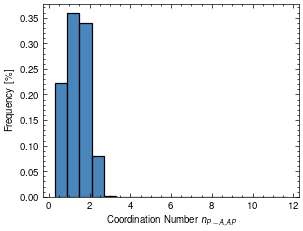

In [32]:
adn = Analyze("../sweep/Pt20Au80_AgBP1_fix_bulk_fraction_hollow_shell_results.csv")
adn.analyze_all("Pt20Au80_AgBP1_fix_bulk_fraction_hollow_shell")

In [8]:
# Still calculating

adn = Analyze("../sweep/Pt40Au60_AgBP1_fix_bulk_fraction_hollow_shell_results.csv")
adn.analyze_all("Pt40Au60_AgBP1_fix_bulk_fraction_hollow_shell")

FileNotFoundError: [Errno 2] No such file or directory: '../sweep/Pt40Au60_AgBP1_fix_bulk_fraction_hollow_shell_results.csv'

In [11]:
import pandas as pd

In [20]:
df = pd.read_csv("../sweep/Pt40Au60_AgBP1_hollow_shell_results.csv")

In [26]:
df = df.dropna()
df = df[df["y"] > 0]

In [28]:
df["y"].mean()

0.33962222534575726